# Lab Assignment: Linear Regression and High-Dimensional Data Analysis

In [ ]:
!pip install pandas scikit-learn

1. **Loading and Visualizing the Dataset**:
   - Use the **California Housing** dataset to predict house prices based on various features such as **median income** and **number of households**.

   **Exercise**:
   - Load the dataset, visualize the first few rows, and plot the relationship between selected features and the target variable.

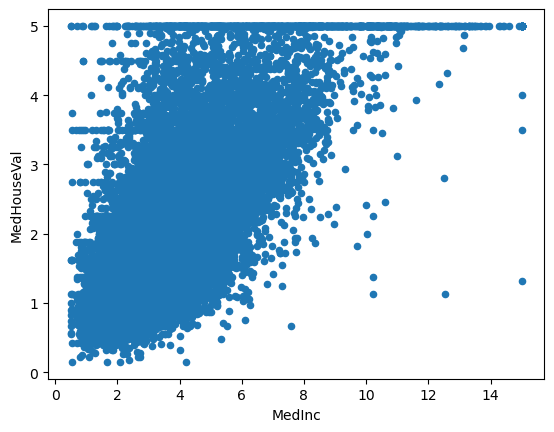

In [38]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

# Load the dataset
cali = fetch_california_housing(as_frame=True)
df = cali.frame

# Visualize data
df.plot(kind='scatter', x='MedInc', y='MedHouseVal')
plt.show()

2. **Implementing Linear Regression with Least Squares (Normal Equation)**:
   - Implement **Linear Regression** using the **Normal Equation**: $( \theta = (X^T X)^{-1} X^T y )$.
   - Use the dataset to solve for $( \theta )$ using matrix operations.

   **Exercise**:
   - Implement the normal equation method and calculate the parameters $( \theta )$.

In [40]:
import numpy as np

def least_squares(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Prepare the data (add intercept term)
X = np.c_[np.ones(df.shape[0]), df['MedInc'].values]
y = df['MedHouseVal'].values

# Calculate theta
theta = least_squares(X, y)
print("Theta:", theta)


Theta: [0.45085577 0.41793849]


## Part 2: Linear Regression using SVD

1. **Using Singular Value Decomposition (SVD) for Linear Regression**:
   - Instead of using the normal equation, solve linear regression using **SVD**. This method is numerically more stable, especially for ill-conditioned or high-dimensional matrices.
   
   **Exercise**:
   - Implement linear regression using the **SVD** decomposition of the matrix \( X \).

In [55]:
def svd_least_squares(X, y):
    # Todo
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    theta_svd = Vt.T @ np.diag(1 / S) @ U.T @ y
    return theta_svd

# Calculate theta using SVD
theta_svd = svd_least_squares(X, y)
print("Theta (SVD):", theta_svd)

Theta (SVD): [0.45085577 0.41793849]


## Part 3: Shortcut (Scikit-learn)

1. **Introducing Scikit-learn's Linear Regression**:
   - Compare your manually implemented Linear Regression (Normal Equation and SVD) with the **Scikit-learn's Linear Regression** model. Use the built-in model for performance comparison.

   **Exercise**:
   - Use `sklearn.linear_model.LinearRegression` to solve the regression problem and compare the results.

In [66]:
from sklearn.linear_model import LinearRegression

# Todo
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
print("Scikit-learn coefficients:", model.coef_)

Scikit-learn coefficients: [0.45085577 0.41793849]


## Part 4: Gradient Descent for Large Datasets

1. **Issues with Direct Methods on Large Datasets**:
   - Demonstrate the performance issue with the **Normal Equation** on very large datasets by creating synthetic data.

   **Exercise**:
   - Generate a large dataset and time the normal equation solution.

In [63]:
import time
from sklearn import datasets

# Generate large synthetic dataset
X_large, y_large, w_true = datasets.make_regression(
    n_samples=100000, # number of points
    n_features=1500, # number of features
    n_informative=1000, # number of informative features
    noise=1.0, # std of y
    bias=0, # bias for the model
    coef=True, # returning true coeffs
    random_state=2024
)

# Time the normal equation solution
start_time = time.time()
theta_large = least_squares(X_large, y_large)
print("Time taken by normal equation:", time.time() - start_time)

Time taken by normal equation: 4.531970977783203


2. **Implementing Gradient Descent**:
   - Introduce **Batch Gradient Descent** as an alternative to handle large datasets efficiently.
   
   **Exercise**:
   - Implement gradient descent to solve the same problem iteratively.

In [69]:
def mini_batch_gradient_descent(X, y, alpha=0.01, iterations=1000, batch_size=32):
    m, n = X.shape
    theta = np.zeros(n)
    for i in range(iterations):
        idx = np.random.choice(m, batch_size, replace=False)
        X_batch = X[idx]
        y_batch = y[idx]
        # Todo
        gradient = (1 / batch_size) * (X_batch.T @ (X_batch @ theta - y_batch))
        theta = theta - alpha * gradient
    return theta

# Run Mini-Batch Gradient Descent
start_time = time.time()
theta_mbgd = mini_batch_gradient_descent(X_large, y_large, alpha=0.1, iterations=500, batch_size=32)
print("Time taken by Gradient Descent:", time.time() - start_time)
print("Difference from true values :", np.mean(abs(theta_mbgd-w_true)))

Time taken by Gradient Descent: 1.1785728931427002
Difference from true values : 5.109802983056313e+28


## Part 5: High-Dimensional Linear Regression

1. **Real-World Dataset with Many Features**:
   - Use a **real-world high-dimensional dataset** (e.g., **Gene Expression Data** or **1000 Genomes Dataset** from the UCI repository or Kaggle). A suitable high-dimensional dataset is the **"Arcene"** dataset (from UCI) with 10,000 features.

   **Exercise**:
   - Download [Arcane](https://archive.ics.uci.edu/dataset/167/arcene) dataset and apply linear regression to solve for $( \theta )$.

In [72]:
# Load training data
arcene_data = pd.read_csv('arcene/ARCENE/arcene_train.data', sep=' ', header=None)
arcene_data = arcene_data.drop(columns=[10000])  # Remove last empty column

# Load training labels
arcene_labels = pd.read_csv('arcene/ARCENE/arcene_train.labels', sep=' ', header=None)

print("Shape of training data:", arcene_data.shape)
print("Shape of training labels:", arcene_labels.shape)

# Implement least squares on high-dimensional dataset
X_hd = arcene_data.values
y_hd = arcene_labels.values.ravel()

# Solve using normal equation
theta_hd = least_squares(X_hd, y_hd)
print("Theta for high-dimensional data:", theta_hd)

FileNotFoundError: [Errno 2] No such file or directory: 'arcene/ARCENE/arcene_train.data'

2. **Ridge Regression for High-Dimensional Data**:
   - Introduce **Ridge Regression (L2 Regularization)** as a solution to overfitting and multicollinearity in high-dimensional data.

   **Exercise**:
   - Implement Ridge Regression using the formula $( \theta = (X^T X + \lambda I)^{-1} X^T y )$.

In [75]:
def ridge_regression(X, y, lambda_):
   m, n = X.shape
   I = np.eye(n)
   return np.linalg.inv(X.T @ X + lambda_ * I) @ X.T @ y

# Apply Ridge Regression
theta_ridge = ridge_regression(X_hd, y_hd, lambda_=0.1)
print("Theta (Ridge):", theta_ridge)

NameError: name 'X_hd' is not defined

## Summary

1. **Linear Regression using different methods**: You implemented Linear Regression using the **Normal Equation**, **SVD**, and **Gradient Descent**.
2. **Comparison**: You compared the manual implementations with **scikit-learn’s** linear regression.
3. **High-Dimensional Data**: You applied linear regression techniques to a real-world **high-dimensional dataset** (Arcene) and explored how **Ridge Regression** can handle overfitting.